In [28]:
import pandas as pd
combined_data=pd.read_csv('combined_data.csv').set_index('video_id')
label = combined_data['label']
features = combined_data.drop(['label'],axis=1)

In [ ]:
# TODO - Add to README References
# https://scikit-learn.org/stable/modules/clustering.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(features.values, label.values, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
y_train_sc = sc.fit_transform(y_train.reshape(-1, 1))
x_axis = np.arange(len(y_train))

For n_clusters = 5 The average silhouette_score is : 0.526306961739968


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

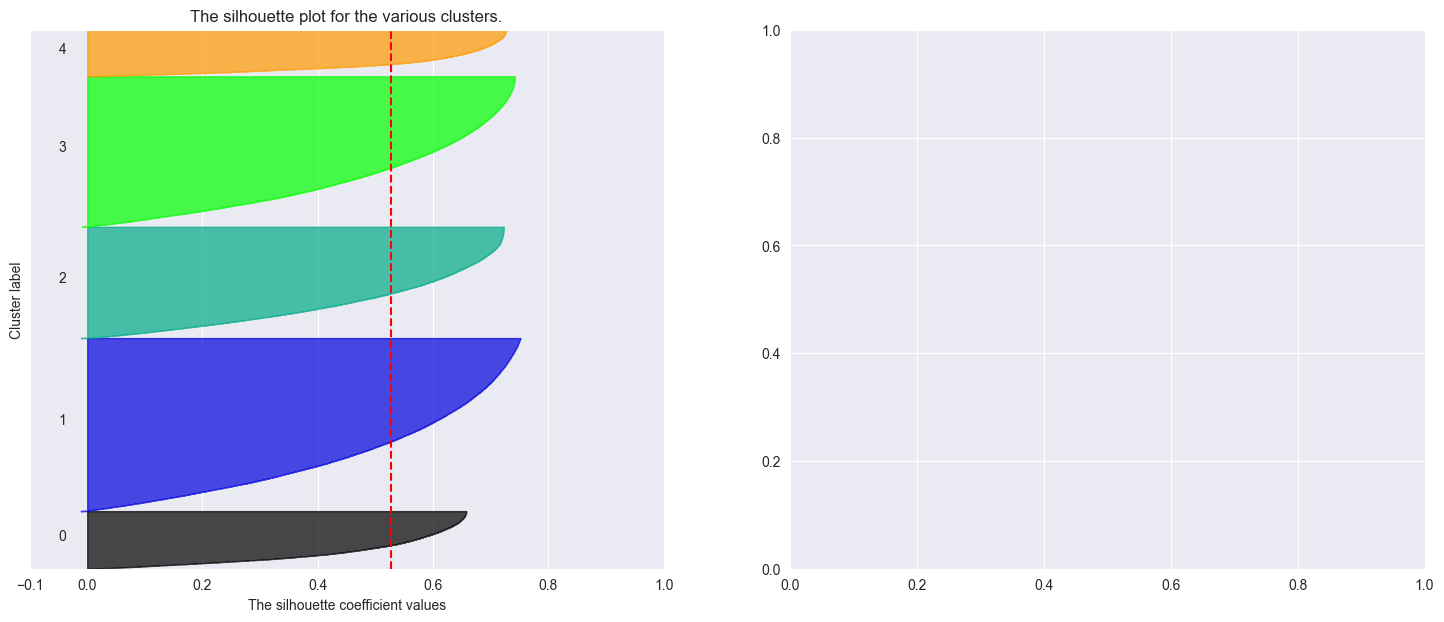

In [33]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(y_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(y_train_sc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(y_train_sc, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(y_train_sc, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x_axis, y_train[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [ ]:
y_train[:, 1]

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, color='orange')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs. Number of clusters (k)')
plt.xticks(np.arange(min(k_values), max(k_values) + 1, 1.0))
plt.grid(True)
plt.savefig(os.path.join(images_path, 'silhouette_score_day_period_start_stations_vs_number_of_clusters.png'))
plt.show()
# Output the optimal k based on silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters k is: {optimal_k}")

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(y_train_sc)
cluster_labels.shape, y_train.shape

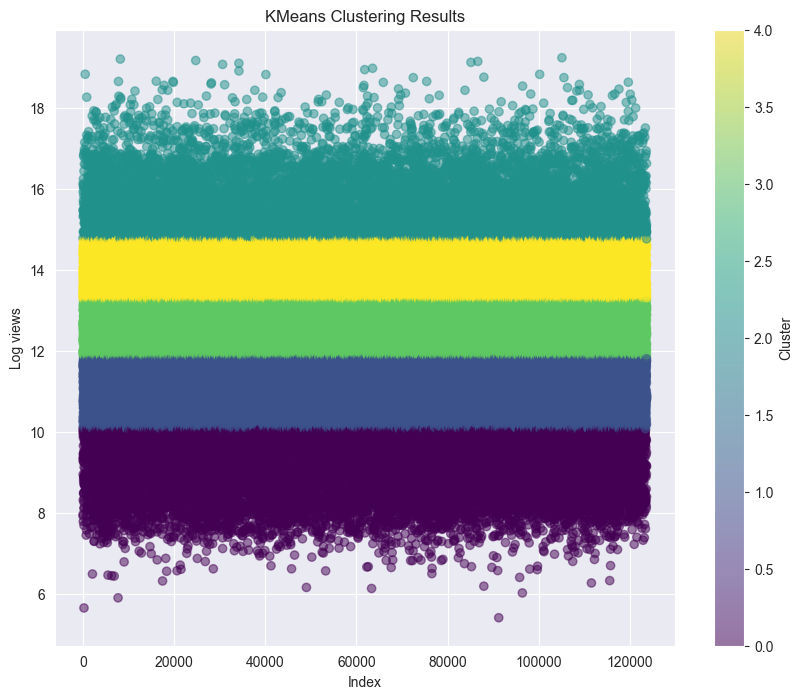

In [27]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 8))

scatter = plt.scatter(x_axis, y_train, c=cluster_labels,
                      cmap='viridis', alpha=0.5)
# , c=pandas_df['prediction'],
#                       cmap='viridis', alpha=0.5)

# Assuming 'day_period_index' and 'start_station_id_index' are numeric or have been appropriately converted for plotting
plt.title('KMeans Clustering Results')
plt.xlabel('Index')
plt.ylabel('Log views')
plt.colorbar(scatter, label='Cluster')
# plt.savefig(os.path.join(images_path, 'k_means_clusters_day_period_start_stations.png'))
plt.show()


# ## Clustering with KMeans 

- Adding a new feature, based on Clusters to the dataset to try and improve the model.

In [ ]:
# Convert cluster labels into a feature
X_with_cluster = np.hstack((x_train_sc, cluster_labels[:, None]))

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Split the enhanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_cluster, y_train, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.3921158825234887


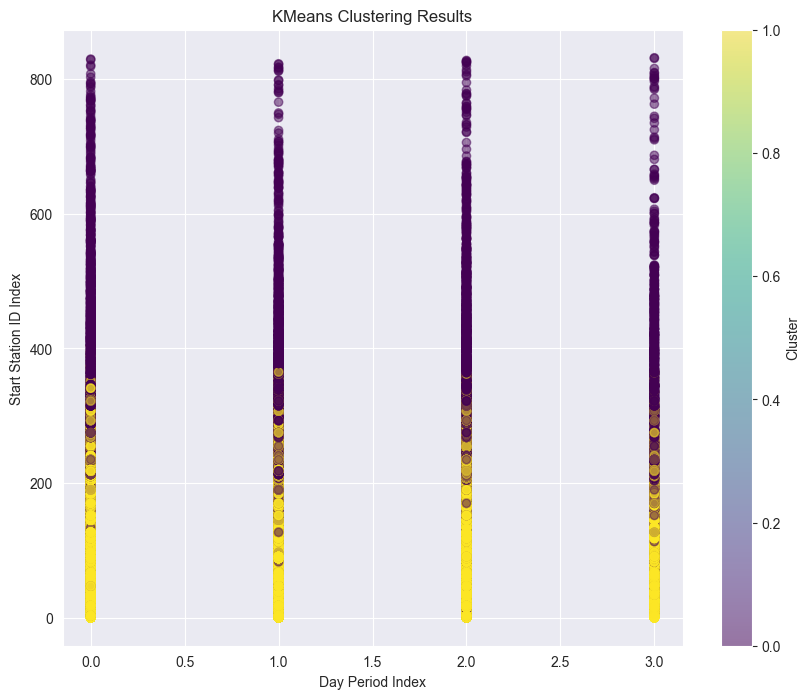

In [10]:
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to Pandas for plotting (assuming this is manageable size-wise)
pandas_df = predictions.select('day_period_index', 'start_station_id_index', 'prediction').toPandas()

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pandas_df['day_period_index'], pandas_df['start_station_id_index'], c=pandas_df['prediction'],
                      cmap='viridis', alpha=0.5)

# Assuming 'day_period_index' and 'start_station_id_index' are numeric or have been appropriately converted for plotting
plt.title('KMeans Clustering Results')
plt.xlabel('Day Period Index')
plt.ylabel('Start Station ID Index')
plt.colorbar(scatter, label='Cluster')
plt.savefig(os.path.join(images_path, 'k_means_clusters_day_period_start_stations.png'))
plt.show()


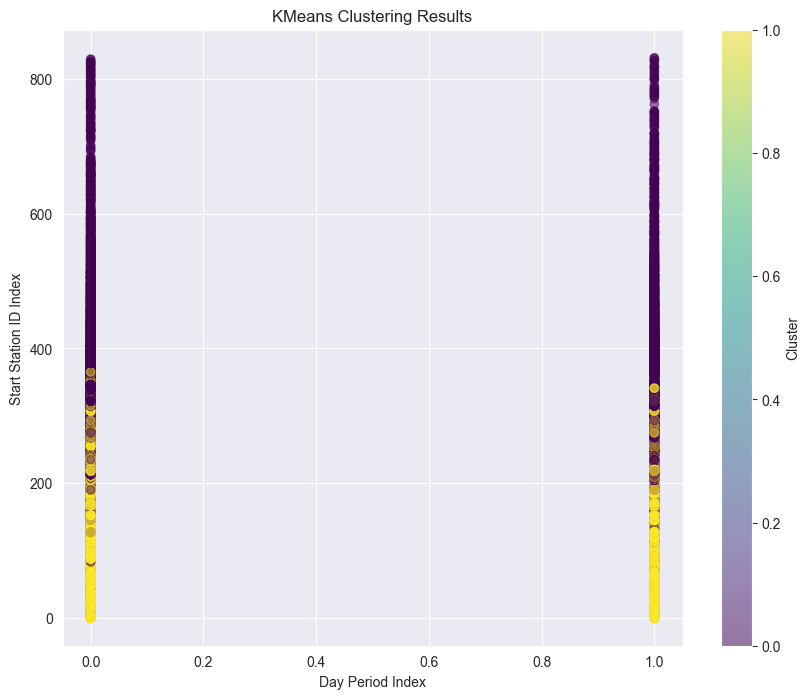

In [11]:
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to Pandas for plotting (assuming this is manageable size-wise)
pandas_df = predictions.select('week_day_index', 'start_station_id_index', 'prediction').toPandas()

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pandas_df['start_station_id_index'], pandas_df['week_day_index'], c=pandas_df['prediction'],
                      cmap='viridis', alpha=0.5)

# Assuming 'day_period_index' and 'start_station_id_index' are numeric or have been appropriately converted for plotting
plt.title('KMeans Clustering Results')
plt.xlabel('Day Period Index')
plt.ylabel('Start Station ID Index')
plt.colorbar(scatter, label='Cluster')
plt.savefig(os.path.join(images_path, 'k_means_clusters_workday_start_stations.png'))
plt.show()


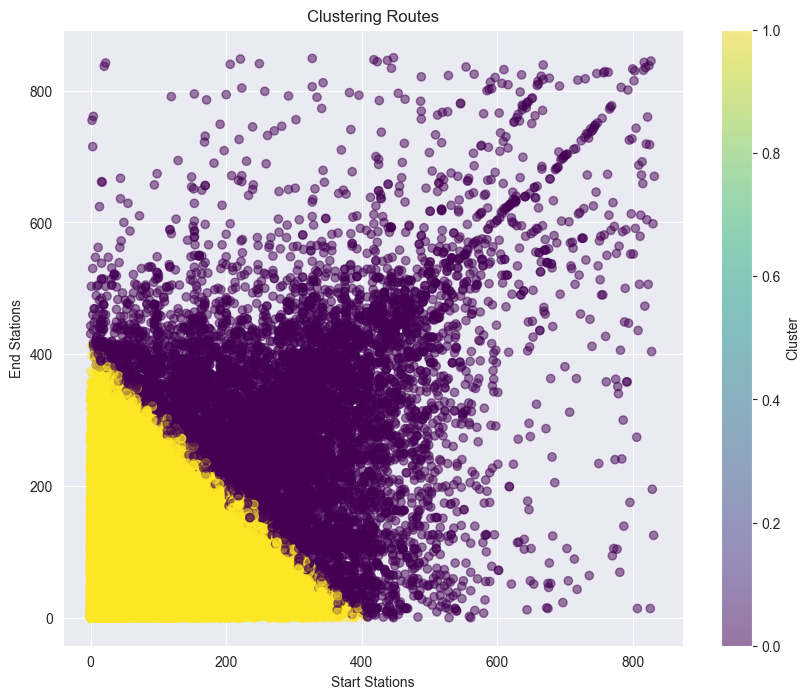

In [14]:
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to Pandas for plotting (assuming this is manageable size-wise)
pandas_df = predictions.select('end_station_id_index', 'start_station_id_index', 'prediction').toPandas()

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pandas_df['start_station_id_index'], pandas_df['end_station_id_index'], c=pandas_df['prediction'],
                      cmap='viridis', alpha=0.5)

# Assuming 'day_period_index' and 'start_station_id_index' are numeric or have been appropriately converted for plotting
plt.title('Clustering Routes')
plt.xlabel('Start Stations')
plt.ylabel('End Stations')
plt.colorbar(scatter, label='Cluster')
plt.savefig(os.path.join(images_path, 'k_means_clusters_end_start_stations.png'))
plt.show()